# Optimizing E-commerce Shipping Using Machine Learning

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,mean_squared_error,r2_score
from sklearn.metrics import roc_curve

### Importing Dataset

In [2]:
data = pd.read_csv('Train1.csv')

### Data Description
- ID: ID Number of Customers.
- Warehouse block:- The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.
- Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product-: Cost of the Product in US Dollars.
- Prior purchases:- The Number of Prior Purchase.
- Product importance:- The company has categorized the product in the various parameter such as low, medium, high.
- Gender:- Male and Female.
- Discount offered:- Discount offered on that specific product.
- Weight in gms:- It is the weight in grams.
- Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.shape

(10999, 12)

In [5]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [7]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
pd.DataFrame(data['Reached.on.Time_Y.N'].value_counts())

,Reached.on.Time_Y.N
1,6563
0,4436


### Preprocessing

In [11]:
data = data.drop(['ID','Gender'], axis=1)

In [12]:
cat_cols = data.select_dtypes('object')
num_cols = data.select_dtypes('number')
cat_cols.columns,num_cols.columns

(Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'], dtype='object'),
 Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
        'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
        'Reached.on.Time_Y.N'],
       dtype='object'))

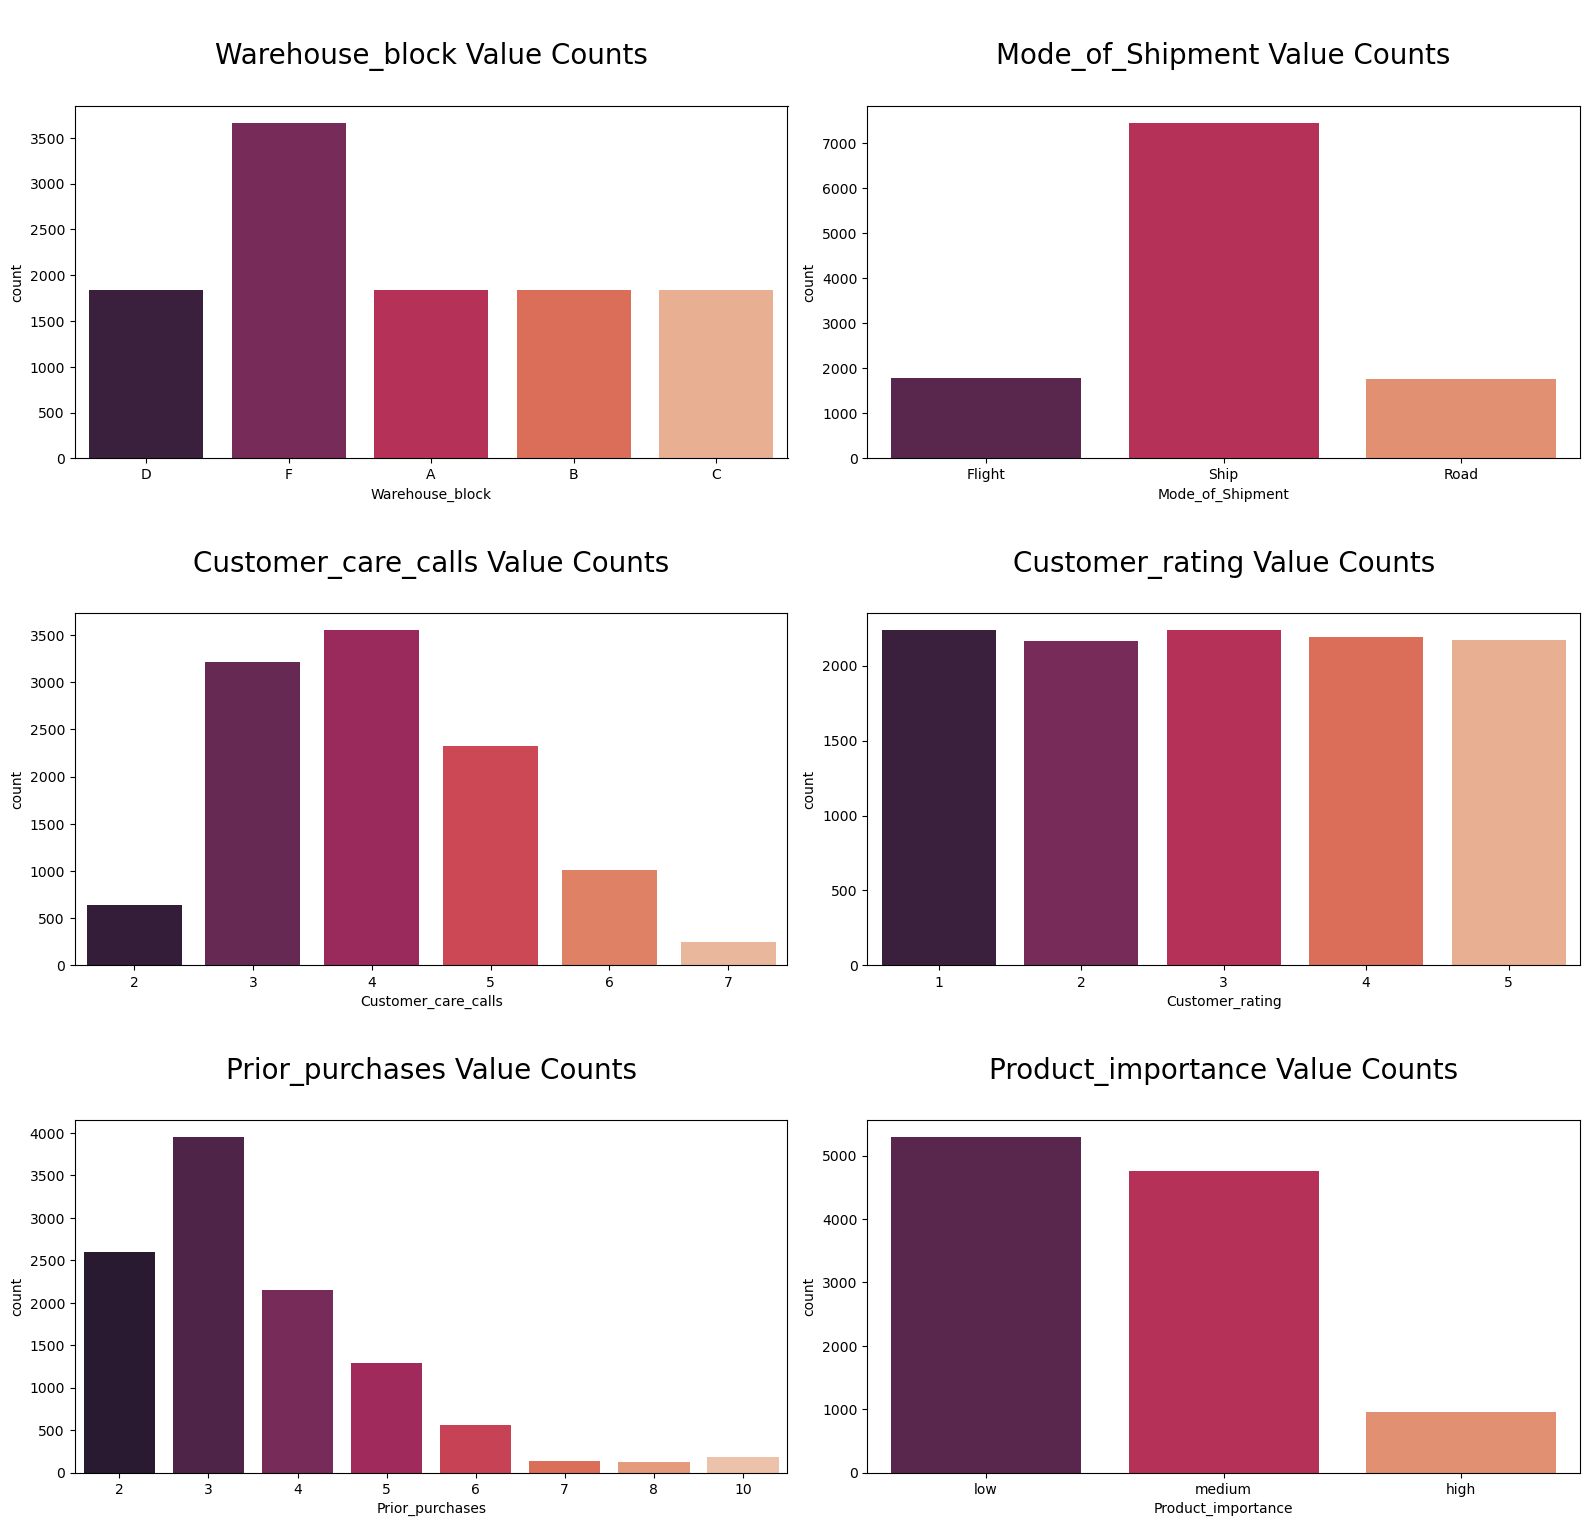

In [13]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance']

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = data, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

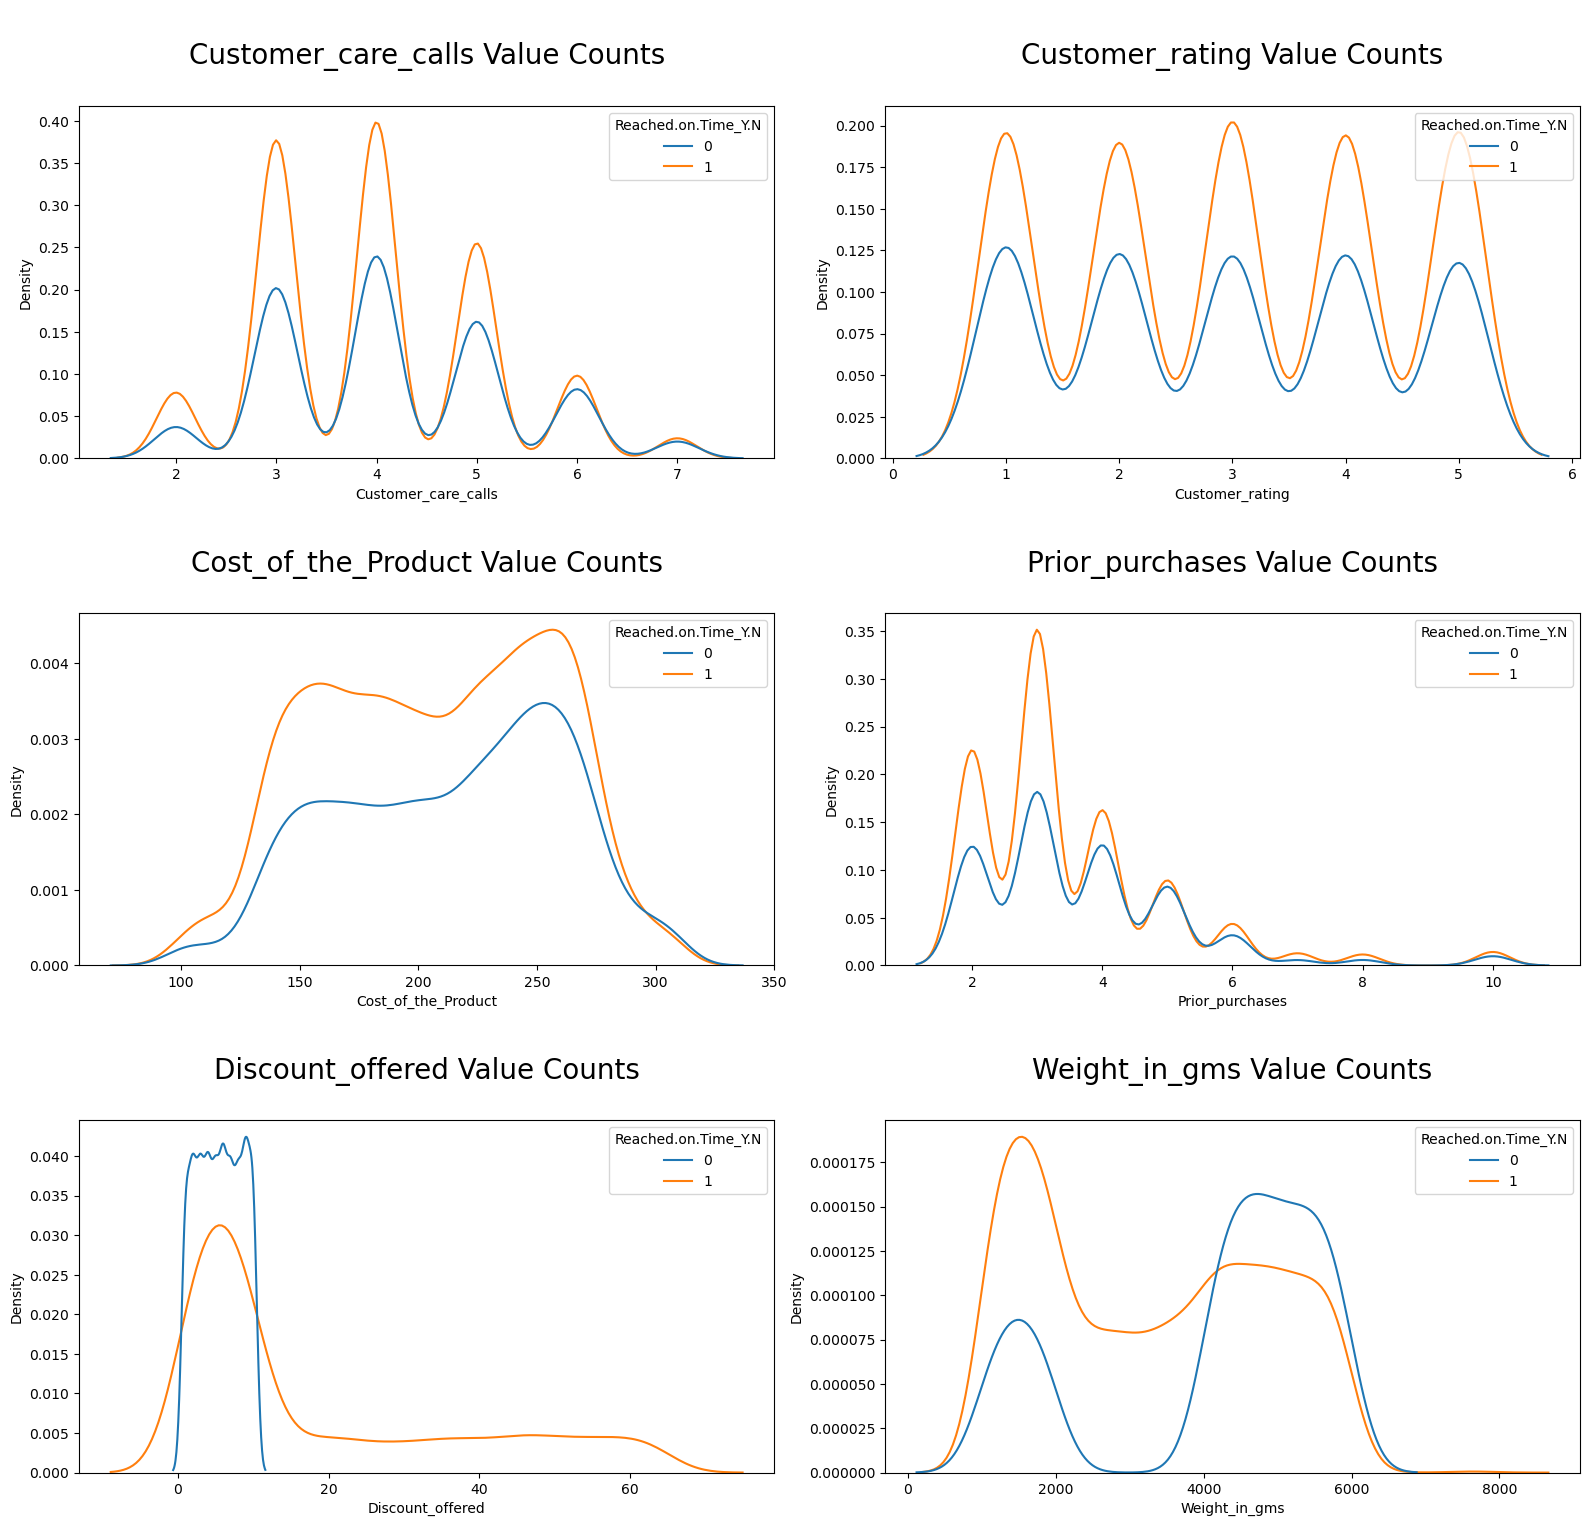

In [14]:
cols = [ 'Customer_care_calls', 'Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.kdeplot(x = cols[i], data = data, ax = ax,hue='Reached.on.Time_Y.N')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<AxesSubplot:>

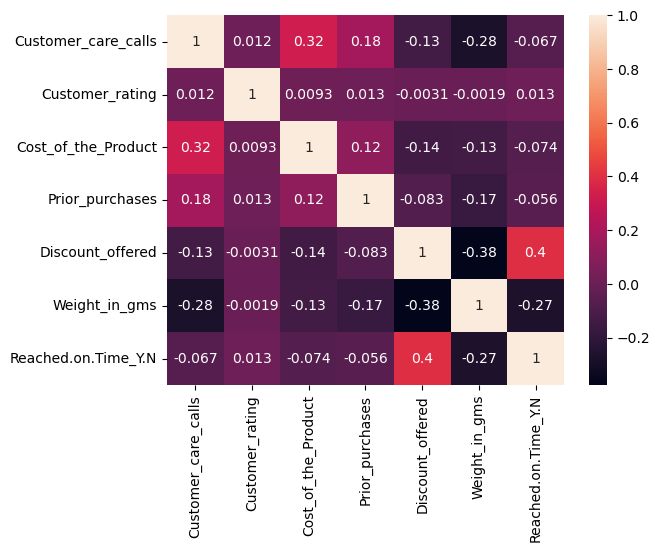

In [15]:
sns.heatmap(data.corr(), annot = True)

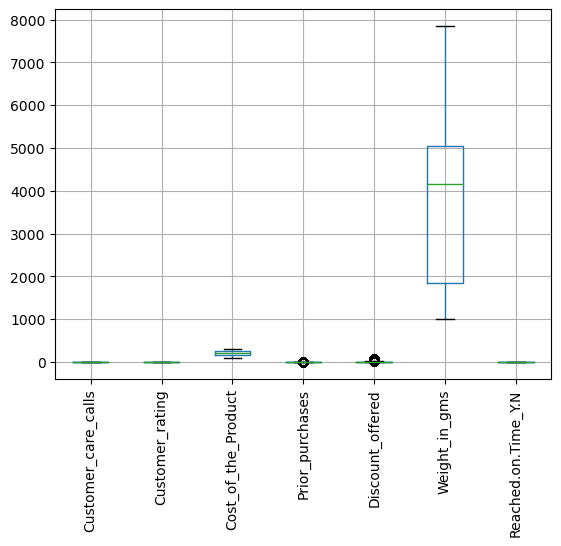

In [16]:
# outliers
data.boxplot()
plt.xticks(rotation=90)
plt.show()

### Extract X and y

In [17]:
X = data.drop(['Reached.on.Time_Y.N'],axis=1)
y = data['Reached.on.Time_Y.N']

In [18]:
def encoder(df):
    
    for col in df.select_dtypes('object'):
        le=LabelEncoder()
        le.fit(df[col])
        df[col]=le.transform(df[col])
    
    return df

In [19]:
X = encoder(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Existing solution and methodology

In [22]:
classifier = LogisticRegression(solver='lbfgs' ,max_iter=9000)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [23]:
accuracy_score(y_test, y_pred)

0.6321212121212121

In [24]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1312
           1       0.70      0.68      0.69      1988

    accuracy                           0.63      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.63      0.63      3300



In [25]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth=4, min_samples_leaf= 3,n_estimators= 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

0.6827272727272727

In [27]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.96      0.71      1312
           1       0.95      0.50      0.66      1988

    accuracy                           0.68      3300
   macro avg       0.75      0.73      0.68      3300
weighted avg       0.79      0.68      0.68      3300



[Text(0.4625, 0.9, 'Cost_of_the_Product <= 0.432\nentropy = 0.977\nsamples = 4890\nvalue = [3159, 4540]\nclass = Delayed'),
 Text(0.25, 0.7, 'Discount_offered <= -0.176\nentropy = 0.959\nsamples = 2946\nvalue = [1749, 2843]\nclass = Delayed'),
 Text(0.2, 0.5, 'Product_importance <= -1.337\nentropy = 0.997\nsamples = 2102\nvalue = [1749, 1545]\nclass = On Time'),
 Text(0.1, 0.3, 'Cost_of_the_Product <= 0.411\nentropy = 0.995\nsamples = 210\nvalue = [150, 178]\nclass = Delayed'),
 Text(0.05, 0.1, 'entropy = 0.993\nsamples = 207\nvalue = [147, 178]\nclass = Delayed'),
 Text(0.15, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = On Time'),
 Text(0.3, 0.3, 'Prior_purchases <= -0.712\nentropy = 0.996\nsamples = 1892\nvalue = [1599, 1367]\nclass = On Time'),
 Text(0.25, 0.1, 'entropy = 0.987\nsamples = 498\nvalue = [446, 339]\nclass = On Time'),
 Text(0.35, 0.1, 'entropy = 0.998\nsamples = 1394\nvalue = [1153, 1028]\nclass = On Time'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 844\nv

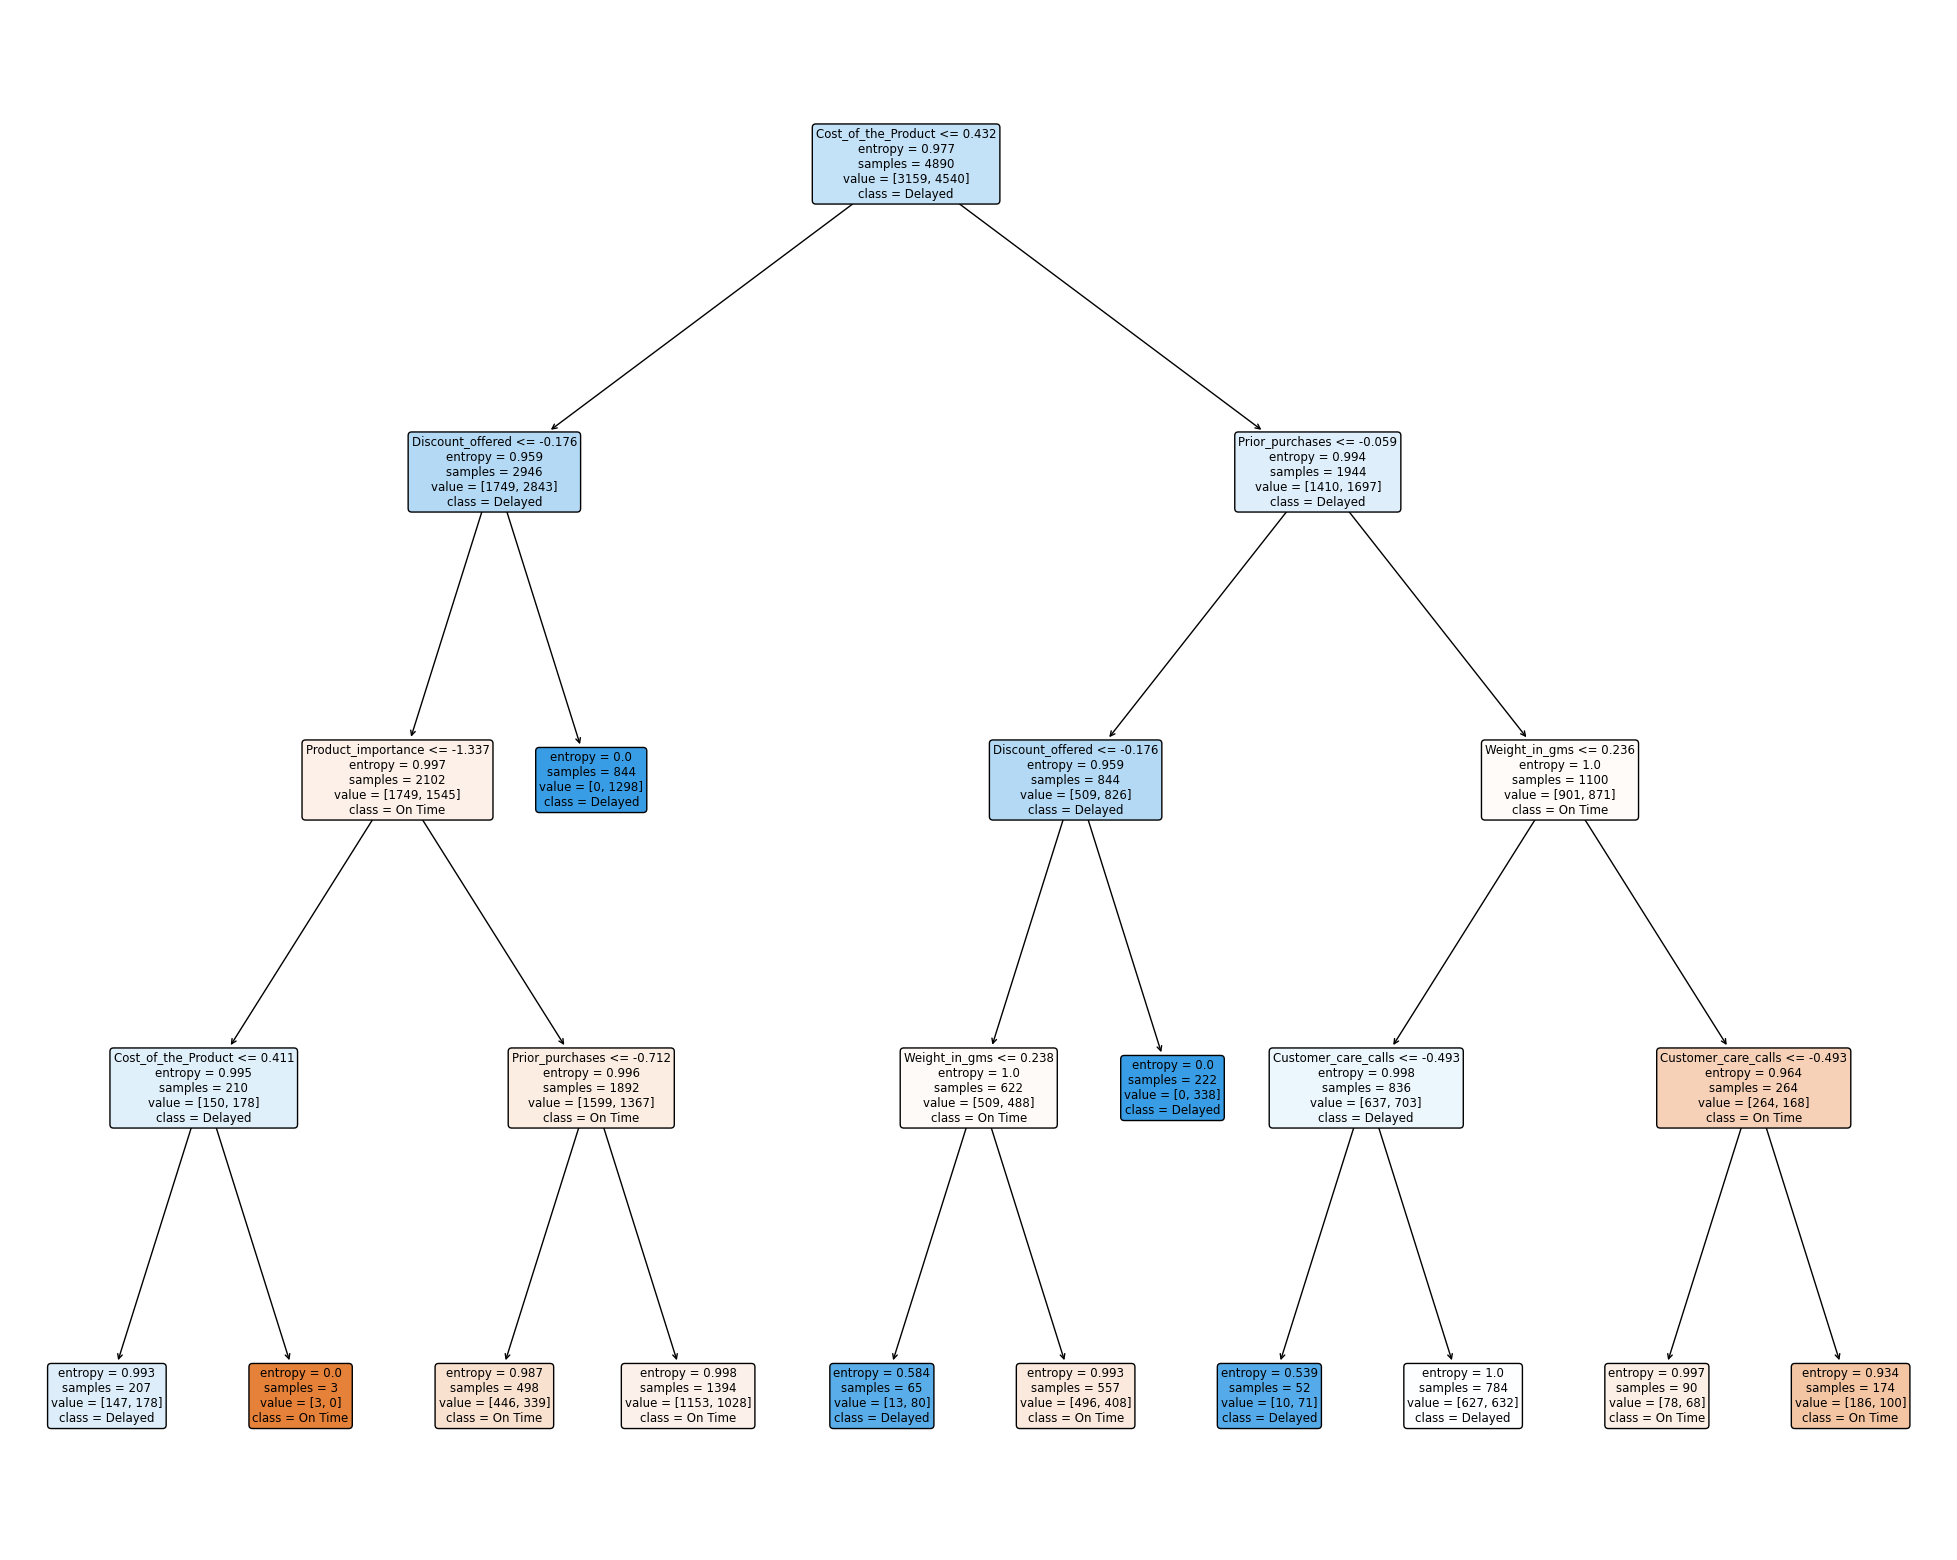

In [28]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf.estimators_[1],feature_names=X.columns,class_names=['On Time','Delayed'],filled = True, rounded = True)

### Proposed Methodology

In [29]:
dt = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_leaf= 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

### Accuracy Score

In [30]:
accuracy_score(y_test, y_pred)

0.6772727272727272

In [31]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.94      0.70      1312
           1       0.93      0.50      0.65      1988

    accuracy                           0.68      3300
   macro avg       0.74      0.72      0.68      3300
weighted avg       0.78      0.68      0.67      3300



[Text(0.5625, 0.9, 'Discount_offered <= -0.176\nentropy = 0.974\nsamples = 7699\nvalue = [3124, 4575]\nclass = Delayed'),
 Text(0.5, 0.7, 'Weight_in_gms <= 0.307\nentropy = 0.997\nsamples = 5856\nvalue = [3124, 2732]\nclass = On Time'),
 Text(0.25, 0.5, 'Prior_purchases <= -0.059\nentropy = 0.993\nsamples = 1969\nvalue = [888, 1081]\nclass = Delayed'),
 Text(0.125, 0.3, 'Weight_in_gms <= 0.228\nentropy = 0.77\nsamples = 479\nvalue = [108, 371]\nclass = Delayed'),
 Text(0.0625, 0.1, 'entropy = 0.427\nsamples = 298\nvalue = [26, 272]\nclass = Delayed'),
 Text(0.1875, 0.1, 'entropy = 0.994\nsamples = 181\nvalue = [82, 99]\nclass = Delayed'),
 Text(0.375, 0.3, 'Cost_of_the_Product <= -0.158\nentropy = 0.998\nsamples = 1490\nvalue = [780, 710]\nclass = On Time'),
 Text(0.3125, 0.1, 'entropy = 0.893\nsamples = 129\nvalue = [40, 89]\nclass = Delayed'),
 Text(0.4375, 0.1, 'entropy = 0.994\nsamples = 1361\nvalue = [740, 621]\nclass = On Time'),
 Text(0.75, 0.5, 'Cost_of_the_Product <= 0.08\nent

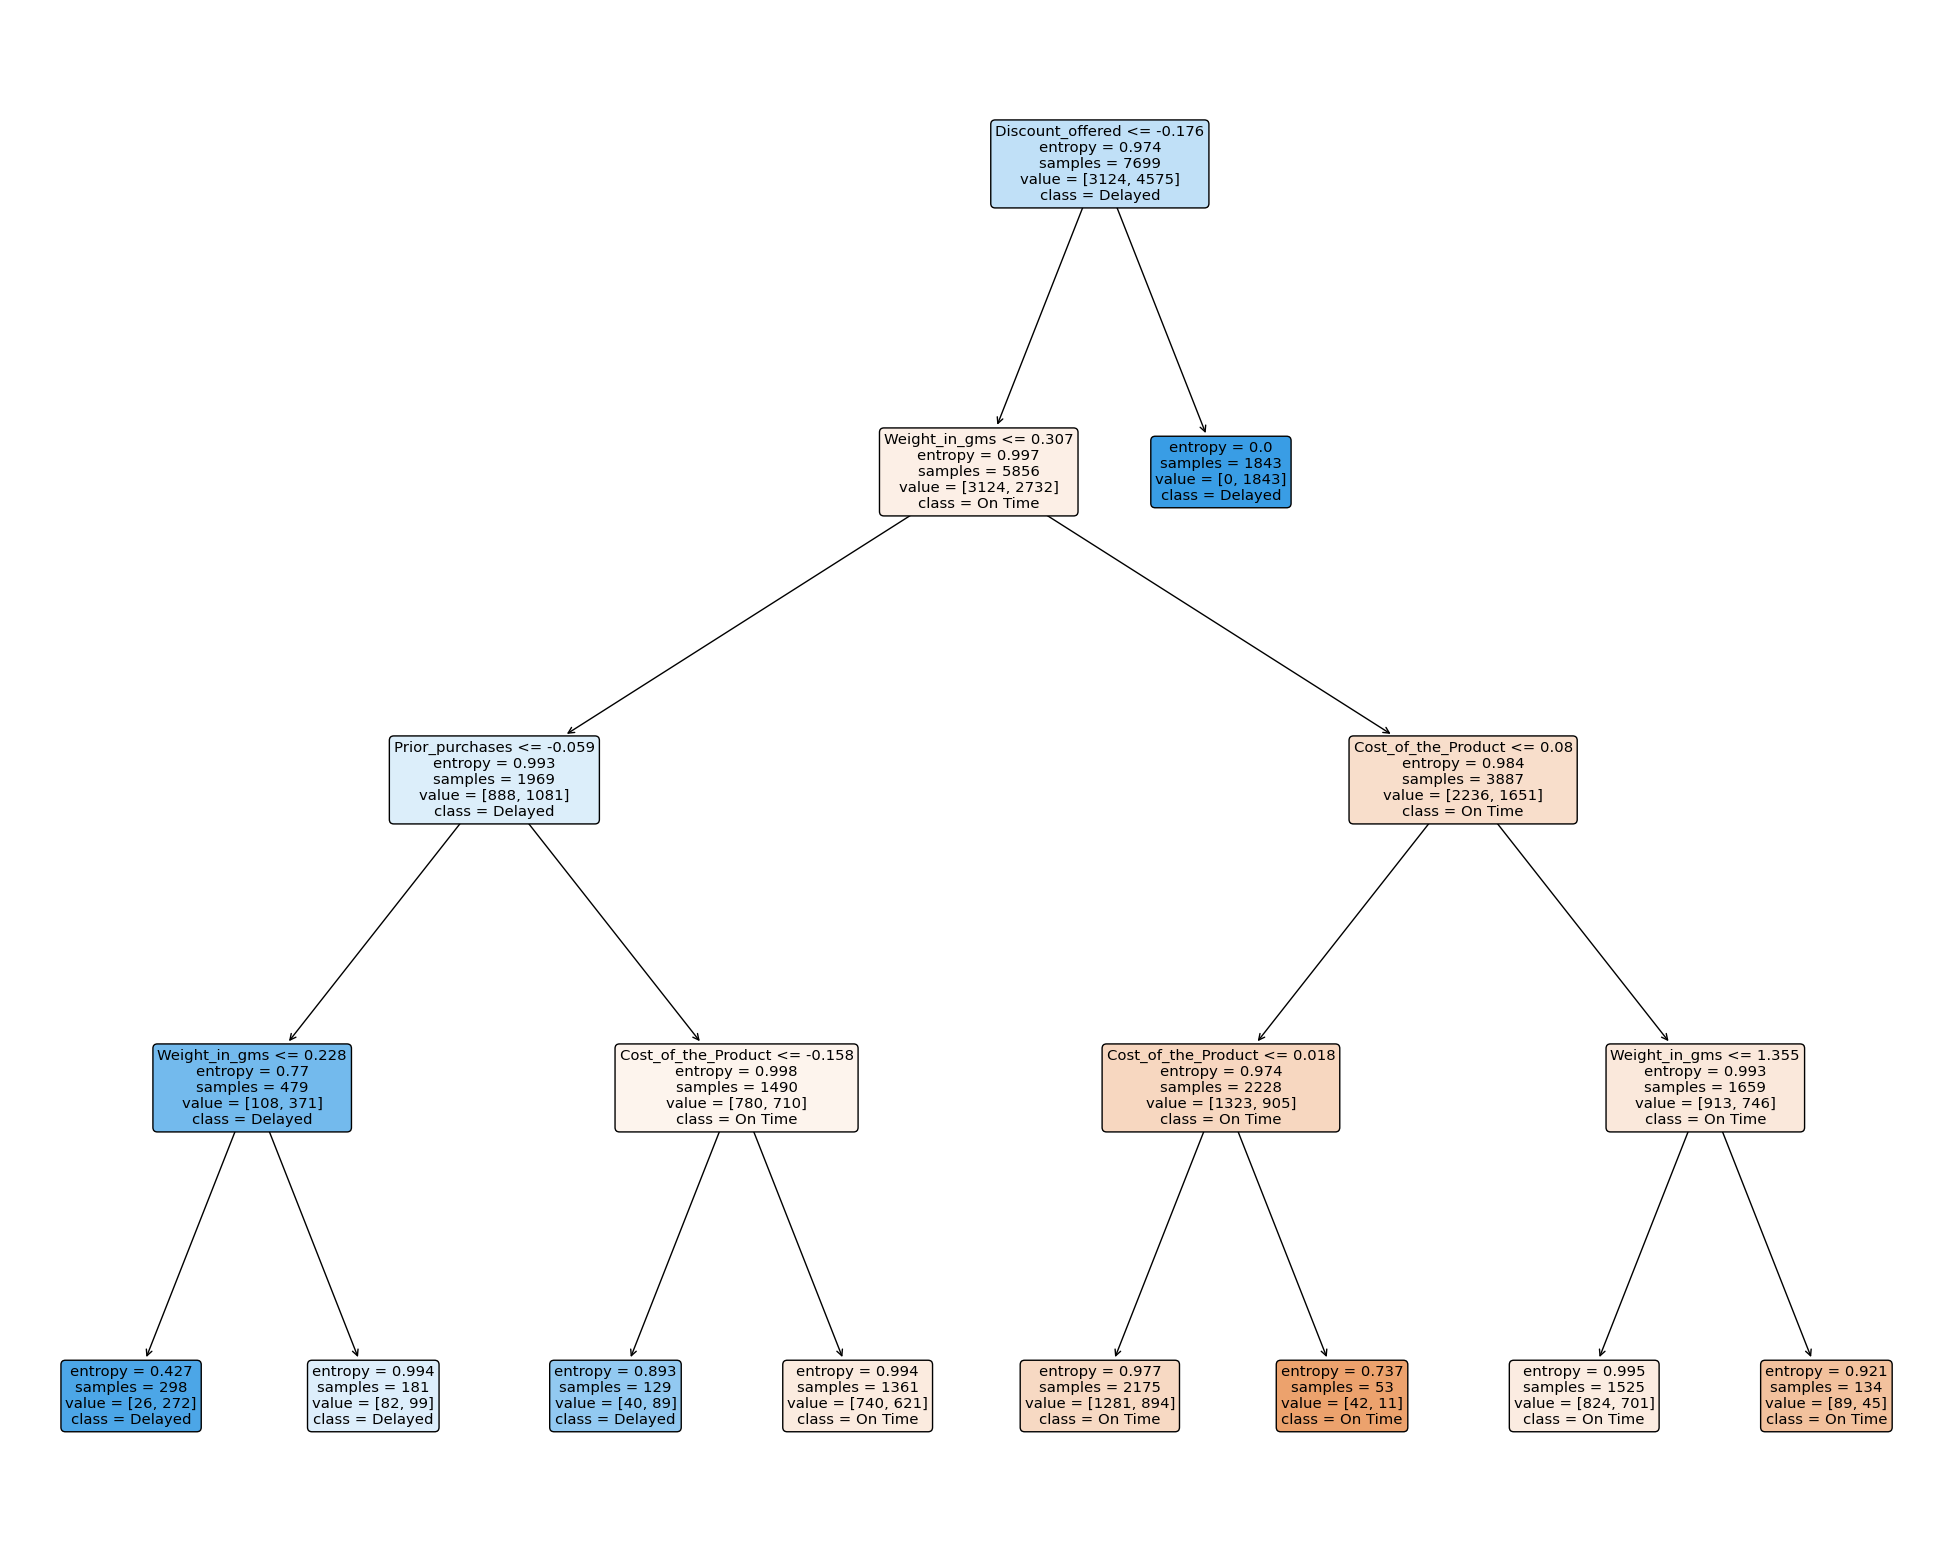

In [32]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=X.columns,class_names=['On Time','Delayed'],filled = True, rounded = True)

In [33]:
confusion_matrix(y_test,y_pred)

array([[1236,   76],
       [ 989,  999]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.94      0.70      1312
           1       0.93      0.50      0.65      1988

    accuracy                           0.68      3300
   macro avg       0.74      0.72      0.68      3300
weighted avg       0.78      0.68      0.67      3300



In [35]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances

Warehouse_block        0.001288
Mode_of_Shipment       0.000781
Customer_care_calls    0.011916
Customer_rating        0.002487
Cost_of_the_Product    0.037331
Prior_purchases        0.060055
Product_importance     0.002561
Discount_offered       0.552428
Weight_in_gms          0.331153
dtype: float64

<AxesSubplot:>

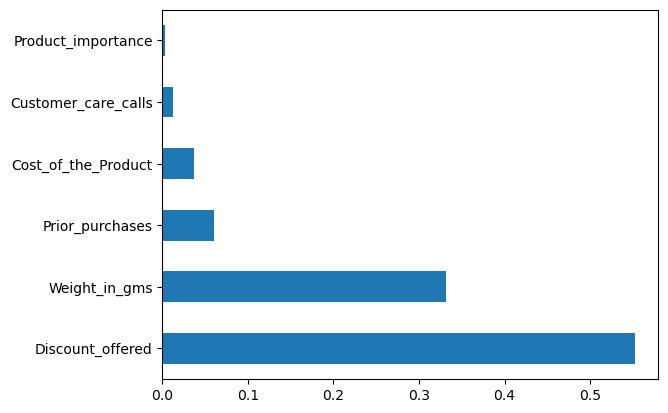

In [36]:
feat_importances.nlargest(6).plot(kind='barh')

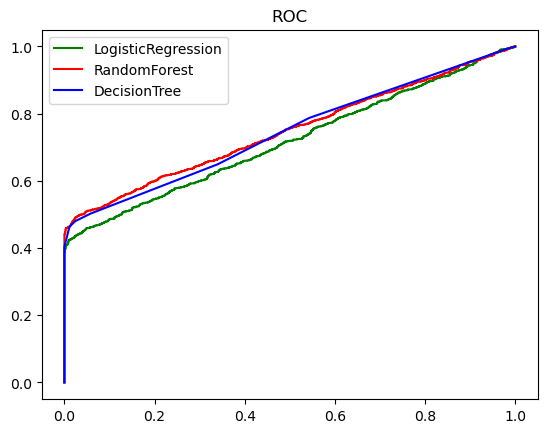

In [37]:
pred_prob  = classifier.predict_proba(X_test)
pred_prob1 = rf.predict_proba(X_test)
pred_prob2 = dt.predict_proba(X_test)
fpr,tbr,threshold    = roc_curve(y_test, pred_prob[:,1],pos_label=1)
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob1[:,1],pos_label=1)
fpr2,tbr2,threshold2 = roc_curve(y_test, pred_prob2[:,1],pos_label=1)
plt.plot(fpr, tbr, linestyle='-', color='green', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='red', label='RandomForest')
plt.plot(fpr2, tbr2, linestyle='-', color='blue', label='DecisionTree')

plt.title('ROC')
plt.legend(loc = 'best')
plt.show()

# Predict Price of the Weight

In [38]:
X1 = data[['Weight_in_gms']]
y1 = data['Cost_of_the_Product']

In [39]:
X1 = sc.fit_transform(X1)

In [40]:
lr=LinearRegression()
lr.fit(X1, y1)
y_pred = lr.predict(X1)
y_pred

array([219.55406694, 212.32476985, 211.21017202, ..., 219.85804817,
       219.64370243, 217.97180569])

In [41]:
print(mean_squared_error(y1, y_pred))
print(r2_score(y1, y_pred))

2269.251729972294
0.01758383342649006


In [42]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X1, y1)
y_pred = knn.predict(X1)
y_pred

array([158. , 225.5, 210.5, ..., 176. , 131. , 159. ])

In [43]:
print(mean_squared_error(y1, y_pred))
print(r2_score(y1, y_pred))

2158.6791071915627
0.06545350375237802


### Predict Price of the new Weight

In [44]:
knn.predict([[3374]])

array([154.])

# Predict the Discount of the Product Cost

In [45]:
X2 = data[['Cost_of_the_Product']]
y2 = data['Discount_offered']

In [46]:
X2 = sc.fit_transform(X2)

In [47]:
lr=LinearRegression()
lr.fit(X2, y2)
y_pred = lr.predict(X2)
y_pred

array([14.92133852, 13.10258724, 14.64153063, ..., 11.89008638,
       12.7761447 , 15.94730078])

In [48]:
print(mean_squared_error(y2, y_pred))
print(r2_score(y2, y_pred))

257.5717523928282
0.01913012246335888


In [49]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X2, y2)
y_pred = knn.predict(X2)
y_pred

array([52.5, 49.5, 42.5, ..., 40. , 37.5, 29. ])

In [50]:
print(mean_squared_error(y2, y_pred))
print(r2_score(y2, y_pred))

750.9813619419947
-1.8598438674941224


### Predict the Discount of the  New Product Cost

In [51]:
knn.predict([[2999]])

array([5.5])